In [6]:
from scanimagetiffio import SITiffIO   

import sys
sys.path.append("..")
from utils_io import get_imaging_files
from utils_image import RegFrame

In [3]:
datafolder = "/media/zilong/4TB Storage HDD/2PImaging/183_03082023"
filenamelist = ["00004", "00005", "00006", "00007", "00008", "00009", "00010", "00012", "00014", "00016", "00017", "00018"]

#get file triples, including Tiff file, VR logs and RE logs
allfiles = get_imaging_files(datafolder, filenamelist, readVRlogs=True)

In [ ]:
tifffile, relogfile, vrlogfile  = allfiles[0]
print ('processing: \n' + tifffile.split('/')[-1] + '\n' + relogfile.split('/')[-1] + '\n' + vrlogfile.split('/')[-1]+'...')

S = SITiffIO()
S.open_tiff_file(tifffile, "r")
S.open_rotary_file(relogfile)
S.open_log_file(vrlogfile)
S.interp_times()  # might take a while...

In [ ]:
X = S.get_all_raw_x()
Z = S.get_all_raw_z()
time =S.get_tiff_times()

In [2]:
#read a tiff wityh python tiff library
from tifffile import TiffFile
tifffile = '/media/zilong/4TB Storage HDD/2PImaging/183_04082023/UnrotTiff_crossdaymatching/04082023_00019_unrot.tif'
with TiffFile(tifffile) as tif:
    tifdata = tif.asarray()

In [3]:
#pritn the size
print (tifdata.shape)

(9000, 346, 346)


In [12]:
meanimg, regimgs = RegFrame(tifdata[:500,:,:])

Reference frame, 6.45 sec.
Registered 200/500 in 3.38s
Registered 400/500 in 5.93s
Registered 500/500 in 7.11s


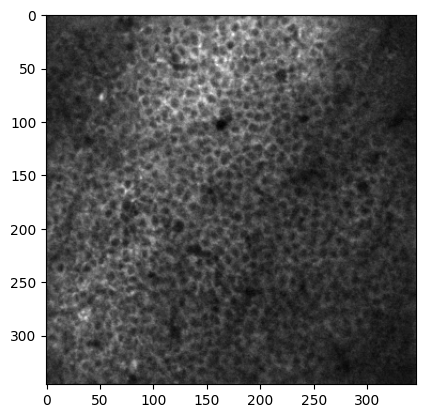

In [13]:
#plot the mean image in regimgs
import matplotlib.pyplot as plt
plt.imshow(meanimg, cmap='gray')